For this analysis I will be looking at the total value for each parcel including the construction on it and any remodeling that may have helped increase it's value.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt

import contextily as ctx
from sodapy import Socrata


# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# to import data from LA Data portal
from sodapy import Socrata
import pandas as pd
import geopandas as gpd

# connect to the data portal
client = Socrata("data.lacounty.gov", None)

results = client.get("9trm-uz8i",
                    limit=50000,
                    where="taxratearea_city='INGLEWOOD' AND rollyear=2010 AND yearbuilt between 2000 and 2010")

df10 = pd.DataFrame.from_records(results)

In [3]:
df10.center_lon = df10.center_lon.astype('float')
df10.center_lat = df10.center_lat.astype('float')

In [4]:
# drop the unmapped rows
df10.drop(df10[df10.center_lon==0].index,inplace=True)

In [5]:
df10.head()

situszip taxratearea_city         ain rollyear taxratearea    assessorid  \
0  90302-1140        INGLEWOOD  4002015038     2010       04569  4002-015-038   
1  90302-1224        INGLEWOOD  4002020007     2010       04569  4002-020-007   
2  90305-1021        INGLEWOOD  4009021013     2010       04569  4009-021-013   
3  90305-1120        INGLEWOOD  4009026002     2010       04569  4009-026-002   
4  90305-1805        INGLEWOOD  4010032006     2010       04569  4010-032-006   

                          propertylocation usetype usecode usecodedescchar1  \
0  1300 CENTINELA AVE  INGLEWOOD CA  90302     C/I    1100       Commercial   
1       114 W 64TH PL  INGLEWOOD CA  90302     R-I    0500      Residential   
2      3029 W 78TH ST  INGLEWOOD CA  90305     SFR    0100      Residential   
3      2406 W 78TH ST  INGLEWOOD CA  90305     SFR    0100      Residential   
4      2611 W 84TH PL  INGLEWOOD CA  90305     SFR    0100      Residential   

   ... situsfraction situsdirection    situsstreet situsunit     situscity  \
0  ...                               CENTINELA AVE            INGLEWOOD CA   
1  ...                            W        64TH PL            INGLEWOOD CA   
2  ...                            W        78TH ST            INGLEWOOD CA   
3  ...                            W        78TH ST            INGLEWOOD CA   
4  ...                            W        84TH PL            INGLEWOOD CA   

  situszip5           rowid center_lat  center_lon  \
0     90302  20104002015038  33.976890 -118.361746   
1     90302  20104002020007  33.979821 -118.358830   
2     90305  20104009021013  33.969333 -118.326292   
3     90305  20104009026002  33.968815 -118.320261   
4     90305  20104010032006  33.961812 -118.321481   

                                          location_1  
0  {'latitude': '33.97689024', 'longitude': '-118...  
1  {'latitude': '33.97982101', 'longitude': '-118...  
2  {'latitude': '33.96933255', 'longitude': '-118...  
3  {'latitude': '33.96881495', 'longitude': '-118...  
4  {'latitude': '33.96181235', 'longitude': '-118...  

[5 rows x 51 columns]

In [6]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   situszip                   576 non-null    object 
 1   taxratearea_city           576 non-null    object 
 2   ain                        576 non-null    object 
 3   rollyear                   576 non-null    object 
 4   taxratearea                576 non-null    object 
 5   assessorid                 576 non-null    object 
 6   propertylocation           567 non-null    object 
 7   usetype                    576 non-null    object 
 8   usecode                    576 non-null    object 
 9   usecodedescchar1           576 non-null    object 
 10  usecodedescchar2           576 non-null    object 
 11  usecodedescchar3           576 non-null    object 
 12  usecodedescchar4           576 non-null    object 
 13  totbuildingdatalines       576 non-null    object 

In [7]:
df10 = df10[['taxratearea_city','rollyear','usecodedescchar1','effectiveyearbuilt','roll_totalvalue','center_lat','center_lon']]

In [8]:
df10.head()

taxratearea_city rollyear usecodedescchar1 effectiveyearbuilt  \
0        INGLEWOOD     2010       Commercial               2007   
1        INGLEWOOD     2010      Residential               2004   
2        INGLEWOOD     2010      Residential               2003   
3        INGLEWOOD     2010      Residential               2002   
4        INGLEWOOD     2010      Residential               2004   

  roll_totalvalue  center_lat  center_lon  
0         2918934   33.976890 -118.361746  
1         1602454   33.979821 -118.358830  
2          294445   33.969333 -118.326292  
3          419983   33.968815 -118.320261  
4          446000   33.961812 -118.321481

In [9]:
# import folium, a leaflet python library
import folium
from folium.plugins import MarkerCluster

In [10]:
# create a list of lat/lon pair for UCLA
ucla = [34.0721237,-118.4440685]
m = folium.Map(location=ucla, zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)

for index,row in df10.iterrows():
    folium.Marker(
        location=[row.center_lat,row.center_lon],
        popup=row.roll_totalvalue,
        icon=folium.Icon(color="red", icon="ok-sign"),
    ).add_to(marker_cluster)
m

In [11]:
# save as html file
m.save('allrolltotalvalue.html')

In [12]:
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [
        {
          "dataId": [
            "arrests"
          ],
          "id": "sreoedtdg",
          "name": [
            "arst_date"
          ],
          "type": "timeRange",
          "value": [
            1598918400000,
            1601078400000
          ],
          "enlarged": True,
          "plotType": "histogram",
          "yAxis": None
        }
      ],
      "layers": [
        {
          "id": "y8t676q",
          "type": "grid",
          "config": {
            "dataId": "arrests",
            "label": "Point",
            "color": [
              34,
              63,
              154
            ],
            "columns": {
              "lat": "lat",
              "lng": "lon"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "worldUnitSize": 0.5,
              "colorRange": {
                "name": "ColorBrewer RdYlGn-6",
                "type": "diverging",
                "category": "ColorBrewer",
                "colors": [
                  "#1a9850",
                  "#91cf60",
                  "#d9ef8b",
                  "#fee08b",
                  "#fc8d59",
                  "#d73027"
                ],
                "reversed": True
              },
              "coverage": 1,
              "sizeRange": [
                0,
                500
              ],
              "percentile": [
                0,
                100
              ],
              "elevationPercentile": [
                0,
                100
              ],
              "elevationScale": 20.9,
              "colorAggregation": "count",
              "sizeAggregation": "count",
              "enable3d": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantize",
            "sizeField": None,
            "sizeScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "arrests": [
              {
                "name": "arst_date",
                "format": None
              },
              {
                "name": "grp_description",
                "format": None
              },
              {
                "name": "sex_cd",
                "format": None
              },
              {
                "name": "descent_cd",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 24,
      "dragRotate": True,
      "latitude": 33.837184166330836,
      "longitude": -118.46478962372794,
      "pitch": 50,
      "zoom": 9,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

In [13]:
# kepler map of arrests with config parameters assigned
from keplergl import KeplerGl
map = KeplerGl(height=600, width=800, data={'df10':df10},config=config)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['arrests'], 'id': 'sreoedtdg…

In [14]:
map.save_to_html(file_name='Roll Total Value 2010',read_only=True)

Map saved to Roll Total Value 2010!


In [15]:
import plotly.express as px

In [16]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 575
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   taxratearea_city    576 non-null    object 
 1   rollyear            576 non-null    object 
 2   usecodedescchar1    576 non-null    object 
 3   effectiveyearbuilt  576 non-null    object 
 4   roll_totalvalue     576 non-null    object 
 5   center_lat          576 non-null    float64
 6   center_lon          576 non-null    float64
dtypes: float64(2), object(5)
memory usage: 36.0+ KB


In [17]:
total_value_by_use=df10.groupby(['usecodedescchar1','roll_totalvalue']).size().reset_index(name='count')

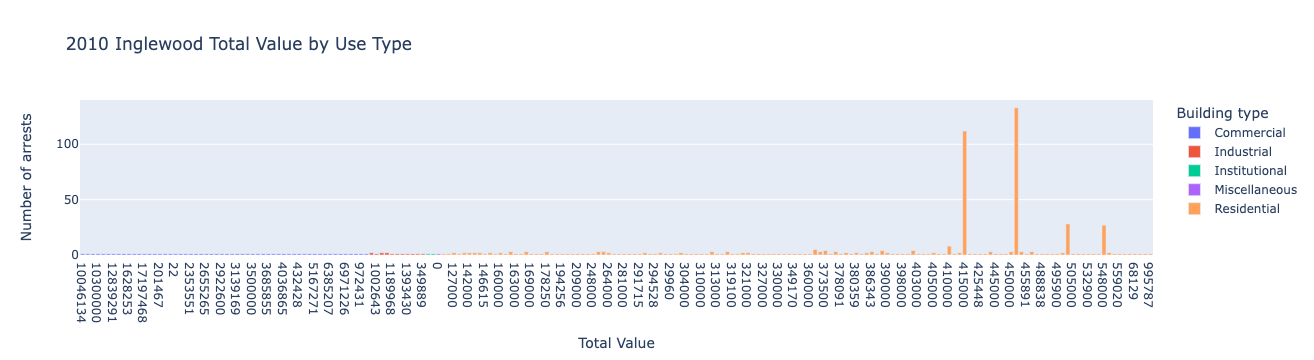

In [18]:
# make a stacked bar chart
fig = px.bar(total_value_by_use,
           x='roll_totalvalue',
           y='count',
           color='usecodedescchar1', # this creates the "stack",
           labels={'roll_totalvalue':'Total Value','count':'Number of arrests','usecodedescchar1':'Building type'},
           title = '2010 Inglewood Total Value by Use Type'
      )
fig.show()

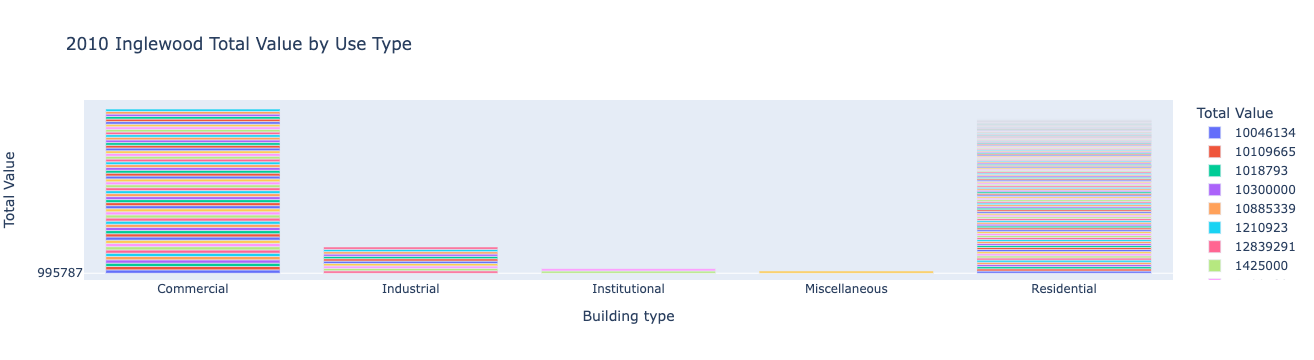

In [19]:
# make a stacked bar chart
fig = px.bar(total_value_by_use,
           x='usecodedescchar1',
           y='roll_totalvalue',
           color='roll_totalvalue', # this creates the "stack",
           labels={'roll_totalvalue':'Total Value','count':'Number of arrests','usecodedescchar1':'Building type'},
           title = '2010 Inglewood Total Value by Use Type'
      )
fig.show()

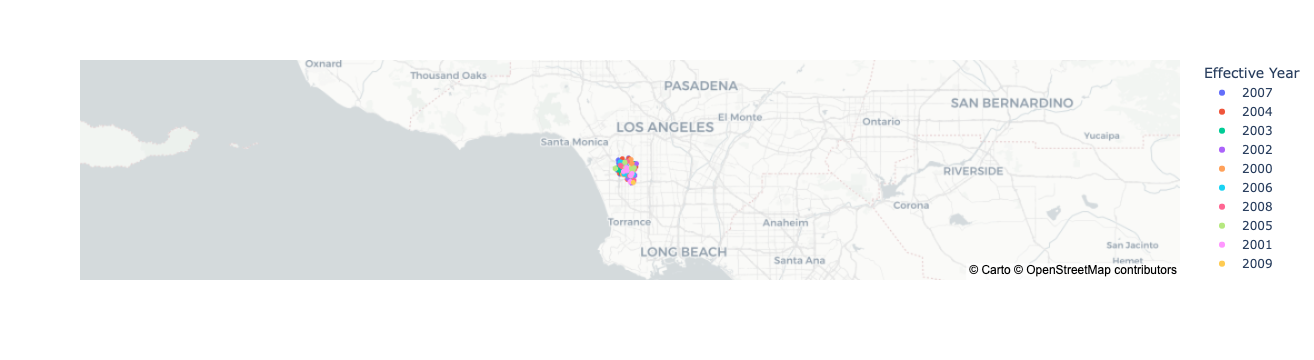

In [20]:
# map it
fig = px.scatter_mapbox(df10, 
                        lat="center_lat", 
                        lon="center_lon", 
                        color="effectiveyearbuilt",
                        labels={'effectiveyearbuilt':'Effective Year'}
                       )
fig.update_layout(mapbox_style="carto-positron")
fig.show()

In [21]:
fig.write_html("effectiveyear_map_plotly.html")

In [22]:
df10

taxratearea_city rollyear usecodedescchar1 effectiveyearbuilt  \
0          INGLEWOOD     2010       Commercial               2007   
1          INGLEWOOD     2010      Residential               2004   
2          INGLEWOOD     2010      Residential               2003   
3          INGLEWOOD     2010      Residential               2002   
4          INGLEWOOD     2010      Residential               2004   
..               ...      ...              ...                ...   
571        INGLEWOOD     2010       Industrial               2005   
572        INGLEWOOD     2010       Industrial               2005   
573        INGLEWOOD     2010       Industrial               2005   
574        INGLEWOOD     2010       Industrial               2005   
575        INGLEWOOD     2010       Industrial               2005   

    roll_totalvalue  center_lat  center_lon  
0           2918934   33.976890 -118.361746  
1           1602454   33.979821 -118.358830  
2            294445   33.969333 -118.326292  
3            419983   33.968815 -118.320261  
4            446000   33.961812 -118.321481  
..              ...         ...         ...  
571         1022695   33.957697 -118.377971  
572         1299492   33.957697 -118.377971  
573         1189968   33.957697 -118.377971  
574         1000463   33.957697 -118.377971  
575         1000463   33.957697 -118.377971  

[576 rows x 7 columns]

In [23]:
# to import data from LA Data portal
from sodapy import Socrata
import pandas as pd
import geopandas as gpd

# connect to the data portal
client = Socrata("data.lacounty.gov", None)

results = client.get("9trm-uz8i",
                    limit=50000,
                    where="taxratearea_city='INGLEWOOD' AND rollyear=2006 AND yearbuilt between 2000 and 2006")

df06 = pd.DataFrame.from_records(results)

In [24]:
df06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   situszip                   461 non-null    object
 1   taxratearea_city           461 non-null    object
 2   ain                        461 non-null    object
 3   rollyear                   461 non-null    object
 4   taxratearea                461 non-null    object
 5   assessorid                 461 non-null    object
 6   propertylocation           454 non-null    object
 7   usetype                    461 non-null    object
 8   usecode                    461 non-null    object
 9   usecodedescchar1           461 non-null    object
 10  usecodedescchar2           461 non-null    object
 11  usecodedescchar3           461 non-null    object
 12  usecodedescchar4           461 non-null    object
 13  totbuildingdatalines       461 non-null    object
 14  yearbuilt 

In [25]:
from sodapy import Socrata
import pandas as pd
import geopandas as gpd

# connect to the data portal
client = Socrata("data.lacounty.gov", None)

results = client.get("9trm-uz8i",
                    limit=50000,
                    where="taxratearea_city='INGLEWOOD' AND rollyear=2020 AND yearbuilt between 2011 and 2020")

df2020 = pd.DataFrame.from_records(results)

In [26]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   situszip                   54 non-null     object
 1   taxratearea_city           55 non-null     object
 2   ain                        55 non-null     object
 3   rollyear                   55 non-null     object
 4   taxratearea                55 non-null     object
 5   assessorid                 55 non-null     object
 6   propertylocation           54 non-null     object
 7   usetype                    55 non-null     object
 8   usecode                    55 non-null     object
 9   usecodedescchar1           55 non-null     object
 10  usecodedescchar2           55 non-null     object
 11  usecodedescchar3           32 non-null     object
 12  usecodedescchar4           30 non-null     object
 13  totbuildingdatalines       55 non-null     object
 14  yearbuilt   